In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

def normalize_text(text, english_only=True):
    text = text.lower().replace('\n', ' ').replace('\r', ' ')
    if english_only:
        # Keep only English letters, digits, common symbols
        text = re.sub(r"[^a-z0-9.,!?;:'\"()\[\]{}<>@#$%^&*\-_=+ ]", '', text)
    return text.strip()

def levenshtein_distance(s1, s2):
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)
    if len(s2) == 0:
        return len(s1)
    previous_row = list(range(len(s2) + 1))
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    return previous_row[-1]

def cer(gt, pred):
    if not gt:
        return 1.0 if pred else 0.0
    return levenshtein_distance(gt, pred) / len(gt)

def wer(gt, pred):
    gt_words = gt.split()
    pred_words = pred.split()
    return levenshtein_distance(gt_words, pred_words) / len(gt_words) if gt_words else 1.0

def EvaluateOCR(csv_name, gt_colname, detected_colname, mode="CER", english_only=True, visualize=False):
    df = pd.read_csv(csv_name)
    gt_texts = df[gt_colname].fillna("").map(lambda x: normalize_text(x, english_only))
    pred_texts = df[detected_colname].fillna("").map(lambda x: normalize_text(x, english_only))

    scores = []
    for gt, pred in zip(gt_texts, pred_texts):
        if mode == "CER":
            score = cer(gt, pred)
        elif mode == "WER":
            score = wer(gt, pred)
        elif mode == "LEV":
            score = levenshtein_distance(gt, pred)
        else:
            raise ValueError("Mode must be 'CER', 'WER', or 'LEV'")
        scores.append(score)

    avg_score = sum(scores) / len(scores)
    print(f"{mode} (English only = {english_only}): {avg_score}")

    if visualize:
        sns.histplot(scores, bins=20, kde=True, color='coral')
        plt.title(f'{mode} Distribution')
        plt.xlabel(mode)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    return avg_score, scores


CER (English only = True): 0.11006182711755075


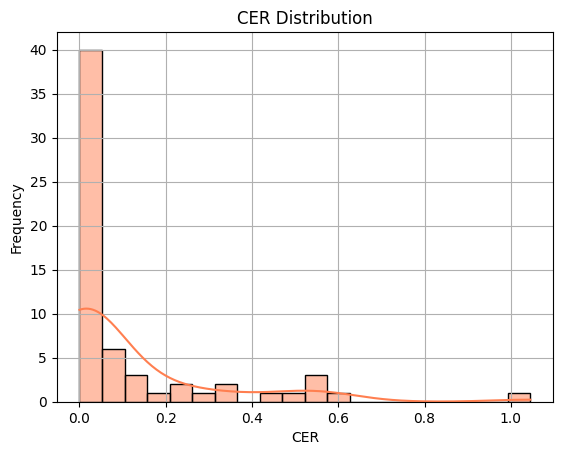

(0.11006182711755075,
 [0.4368029739776952,
  0.34196891191709844,
  0.014192139737991267,
  0.01015228426395939,
  0.09022556390977443,
  0.001996007984031936,
  0.0,
  0.1981747066492829,
  0.23529411764705882,
  0.5277777777777778,
  0.14465408805031446,
  0.5060240963855421,
  0.023952095808383235,
  0.0,
  0.27241379310344827,
  0.0,
  0.027777777777777776,
  0.0,
  0.3271604938271605,
  0.0,
  0.0,
  0.01092896174863388,
  0.0,
  0.0,
  0.216,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.5714285714285714,
  0.0,
  0.01092896174863388,
  0.0,
  0.07142857142857142,
  0.0,
  0.0,
  0.0,
  0.13043478260869565,
  0.0,
  0.5372093023255814,
  0.0,
  0.0,
  0.0,
  0.0,
  0.07142857142857142,
  0.09722222222222222,
  0.0,
  0.07407407407407407,
  0.0,
  0.0,
  0.0,
  0.0,
  0.09090909090909091,
  1.0450643776824033,
  0.01576182136602452,
  0.0,
  0.1111111111111111,
  0.6012145748987854,
  0.010121457489878543])

In [4]:
EvaluateOCR("Qwen3b_GT - Sheet1.csv", "Human-recognized Text", "recognized_text", mode="CER", english_only=True, visualize=True)
